# <b>CS156 (Introduction to AI), Spring 2022</b>
# <u><b>Homework 4 submission</b></u>

### Roster Name: Austin Rivard
### Preferred Name (if different):
### Student ID: 015044445
### Email address: austin.rivard@sjsu.edu
Any special notes or anything you would like to communicate to me about this homework submission goes in here.

##  <u>References and sources </u>

List all your references and sources here.
This includes all sites/discussion boards/blogs/posts/etc. where you grabbed some code examples.

##  <u>Solution</u>

#### Load libraries and set random number generator seed

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
from sklearn.metrics import plot_confusion_matrix

In [2]:
np.random.seed(42)

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#### Code the solution

In [4]:
# 1. Load the data. 

filepath = '/content/drive/My Drive/Colab Notebooks/homework4_input_data.csv'
df = pd.read_csv(filepath)

df

,id,ASS1,SPX,C6orf141,SP5,SP6,ITGA8,ATP2A1,ATP2A3,ITGA2,...,IKZF1,SLC14A1,TCEAL2,TCEAL7,TCEAL5,VCAN,CDR1,KRBOX1,SELL,Class
0,TCGA-AB-2828-03,3.935027,0.523329,0.000000,0.000000,0.102277,2.686908,2.837357,7.444575,2.246715,...,8.972232,1.560704,0.000000,0.000000,0.000000,11.189255,5.866117,0.000000,7.560923,Leukemia
1,TCGA-AB-2846-03,3.372801,0.000000,0.000000,0.000000,0.116270,2.083429,5.567935,8.361999,3.626850,...,8.662337,2.509522,0.000000,0.000000,0.000000,9.472547,6.514825,0.289298,8.023838,Leukemia
2,TCGA-AB-2870-03,4.198301,0.000000,0.000000,0.000000,0.249176,1.546059,6.605116,9.138359,2.858430,...,8.848274,3.137405,0.185980,0.000000,0.000000,9.710047,0.000000,0.000000,8.031553,Leukemia
3,TCGA-AB-2872-03,4.115014,0.000000,0.000000,0.222018,0.632254,2.158989,6.858708,9.201254,2.295229,...,7.730065,3.087055,0.380857,0.236820,0.000000,6.085074,6.012453,0.411678,5.186830,Leukemia
4,TCGA-AB-2881-03,3.662169,0.467823,0.000000,0.000000,0.000000,1.183388,5.567935,9.040883,1.815837,...,8.414421,2.683150,0.176611,0.000000,0.000000,8.203471,5.718898,0.000000,8.031553,Leukemia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4331,TCGA-PG-A5BC-01,6.752567,2.061867,2.220238,1.670146,2.089802,4.105404,2.631701,3.974129,4.013841,...,3.698293,1.362715,3.888618,5.573470,4.011728,7.686758,7.651728,3.293383,2.737921,Uterine
4332,TCGA-PG-A6IB-01,6.481851,0.195973,3.082744,3.152085,1.974102,2.222543,2.449799,5.039194,2.903390,...,4.814241,1.090338,2.564054,4.638007,3.420460,6.780378,6.572266,0.912975,3.518969,Uterine
4333,TCGA-PG-A7D5-01,7.776659,0.859361,2.016015,1.995366,3.934322,2.520344,3.657478,3.805650,3.698809,...,3.442377,2.463595,5.406420,4.638007,4.104928,6.908519,10.183748,4.845148,2.069559,Uterine
4334,TCGA-PG-A914-01,8.421619,1.287896,0.000000,0.147612,2.094130,2.266953,1.881556,3.754020,3.412572,...,4.304535,0.841096,0.814483,1.931713,2.962235,6.634303,6.314444,1.895622,2.899793,Uterine


In [5]:
colors = {"Breast": '#4287f5', 
          "Bladder": '#19c5e3', 
          "Colon": '#80d941', 
          "Glioblastoma": '#179933', 
          "Head&Neck": '#f07e78', 
          "Kidney": '#f01e13', 
          "Leukemia": '#f0841f', 
          "LungAdeno": '#db5209', 
          "LungSquamous": '#ce8ced', 
          "Ovarian": '#551075', 
          "Rectal": '#e3d329', 
          "Uterine": '#cc3423'}

df['color'] = df['Class'].map(colors)
df.iloc[:, -2:]

,Class,color
0,Leukemia,#f0841f
1,Leukemia,#f0841f
2,Leukemia,#f0841f
3,Leukemia,#f0841f
4,Leukemia,#f0841f
...,...,...
4331,Uterine,#cc3423
4332,Uterine,#cc3423
4333,Uterine,#cc3423
4334,Uterine,#cc3423


In [6]:
X = df.iloc[:, 1:3001]
Y = df.iloc[:, 3001]

In [7]:
Xpc = PCA(2).fit_transform(X)
Xpc

array([[82.04598902, 46.7130452 ],
       [76.72251477, 37.9190887 ],
       [76.64320355, 39.8676599 ],
       ...,
       [-6.45313027, -2.46852613],
       [ 1.54972972,  3.37494376],
       [ 9.11558797,  9.49003632]])

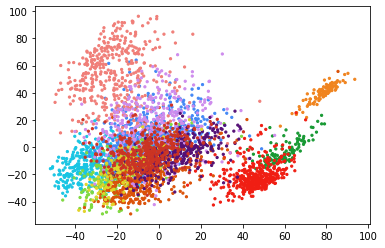

In [8]:
# 2. Produce a PCA plot of the input data, using the colors specified above.

plt.scatter(Xpc[:, 0], Xpc[:, 1], s=5, c=df['color'])

In [9]:
# 3. Normalize the data using StandardScaler.  

X = StandardScaler().fit_transform(X)

In [10]:
# 4. Break the data into the training and test datasets at 80/20 proportion

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0, stratify=Y)
X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

((3468, 3000), (3468,), (868, 3000), (868,))

In [13]:
# 5. Define SVM model hyperparameters of your choice

model = LinearSVC(multi_class='ovr', class_weight='balanced')

In [15]:
# 6. Run and report results from 5-fold cross-validation.

scores = cross_val_score(model, X_train, Y_train)
print('Individual cross-validation accuracies:', scores)
print('Mean cross-validation accuracy:', np.mean(scores))

Individual cross-validation accuracies: [0.95821326 0.96685879 0.96253602 0.96536797 0.96681097]
Mean cross validation accuracy: 0.9639574002686395


In [16]:
# 7. Train the final model on all the training data and assess model performance on the test set. 

model.fit(X_train, Y_train)

model.score(X_test, Y_test)

0.9758064516129032

Text(0.5, 1.0, 'Normalized confusion matrix')

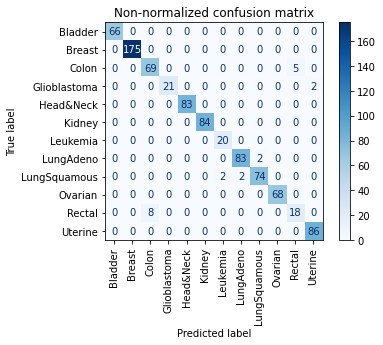

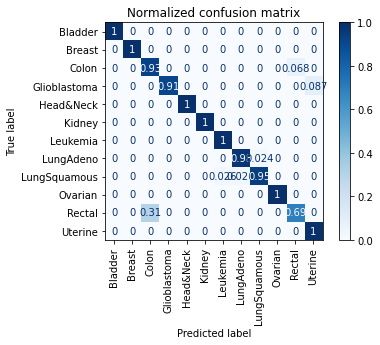

In [30]:
# 8. Plot two confusion matrices for test set predictions (one non-normalized and one normalized).

from sklearn.metrics import ConfusionMatrixDisplay

# non-normalized
ConfusionMatrixDisplay.from_estimator(model, X_test, Y_test,
                                      cmap=plt.cm.Blues,
                                      xticks_rotation='vertical',
                                      normalize=None).ax_.set_title('Non-normalized confusion matrix')

# normalized
ConfusionMatrixDisplay.from_estimator(model, X_test, Y_test,
                                      cmap=plt.cm.Blues,
                                      xticks_rotation='vertical',
                                      normalize='true').ax_.set_title('Normalized confusion matrix')